In [1]:
from tqdm import tqdm 
import tensorflow as tf 
from tensorflow.keras.applications import NASNetLarge
from keras.layers import Flatten, Input
from keras.models import Model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
import keras
from PIL import Image
from PIL import Image as pil_image
from tqdm.notebook import tqdm


In [2]:
model = NASNetLarge(include_top=False,weights="imagenet",pooling=max)

In [3]:
import glob
image_list = glob.glob("./image_samples/*")
width_height_tuple=(331, 331)
interpolation='nearest'
_PIL_INTERPOLATION_METHODS = {
        'nearest': pil_image.NEAREST,
        'bilinear': pil_image.BILINEAR,
        'bicubic': pil_image.BICUBIC,
    }
resample = _PIL_INTERPOLATION_METHODS[interpolation]


In [4]:
dataset = []

for image in tqdm(image_list[:500]):
    try:
        img = Image.open(image)
        img = img.resize(width_height_tuple, resample)
        img = keras.preprocessing.image.img_to_array(img)
        x = np.expand_dims(img, axis=0) 
        x = preprocess_input(x)
        features = model.predict(x)
        vec_image = features.squeeze()
        vol_shape = vec_image.shape[:-1]
        n_voxels = np.prod(vol_shape)
        voxel_by_time = vec_image.reshape(n_voxels, vec_image.shape[-1])
        result = voxel_by_time.flatten()
        dataset.append(result)
    except:
        pass
    

In [5]:
len(dataset)

493

In [6]:
dataset[0].shape

(487872,)

In [8]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:

# Определяем модель и скорость обучения
modeltsne = TSNE(learning_rate=100)

# Обучаем модель
transformed = modeltsne.fit_transform(dataset)

# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis)
plt.show()

In [54]:
transformed.prod

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [16]:
dbscan = DBSCAN(n_jobs=-1, eps=0.3, min_samples=10)
dbscan.fit(dataset)

DBSCAN(eps=0.3, min_samples=10, n_jobs=-1)

In [17]:
dbscan.labels_

array([-1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1

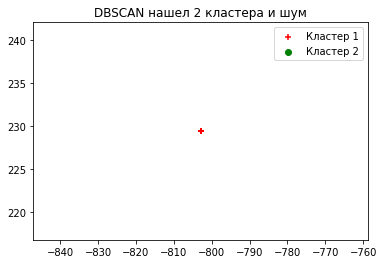

In [23]:
# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(dataset)
pca_2d = pca.transform(dataset)

# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
plt.legend([c1, c2], ['Кластер 1', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()

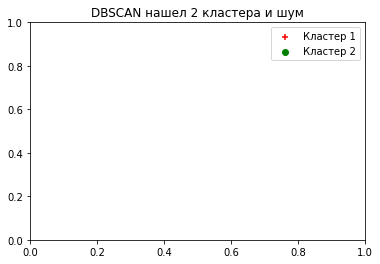